In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
pd.options.mode.chained_assignment = None

/kaggle/input/city-puzzle/data_quests.csv
/kaggle/input/city-puzzle/data (2).csv


In [5]:
df = pd.read_csv('/kaggle/input/city-puzzle/data (2).csv',decimal=',')
df.head(10)

,company,title,duration,route,gamers,price,place
0,Палитра,Итальянцы в Ленинграде,180,5.0,1-50,3500,"м. Невский проспект, г. Санкт-Петербург"
1,Палитра,Петропавловская крепость,90,2.0,2-30,4900,"м. Горьковская, г. Санкт-Петербург"
2,Палитра,Фонтаны Петергофа,120,3.0,1-18,6100,г. Петергоф
3,IQ 365,Шерлок Холмс. Дело о похищенном Кохинуре,240,8.0,1-3,990,ЦПКиО им. Кирова (Санкт-Петербург)
4,IQ 365,Шерлок Холмс и Черная книга,90,4.0,1-3,990,Приморский парк Победы (Санкт-Петербург)
5,IQ 365,Авантюристы Карибского моря,240,10.0,1-3,990,ЦПКиО им. Кирова (Санкт-Петербург)
6,IQ 365,Наследство американского дядюшки,90,3.0,1-3,990,Приморский парк победы (Санкт-Петербург)
7,IQ 365,В поисках Улисса,120,3.0,1-3,990,Петропавловская крепость (Санкт-Петербург)
8,Quests Team,Город под защитой ангелов,180,8.0,2-6,1290,"м. Василеостровская, г. Санкт-Петербург"
9,Quests Team,В поисках Пегасов,120,5.0,2-6,1290,"м. Василеостровская, г. Санкт-Петербург"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   company   82 non-null     object 
 1   title     85 non-null     object 
 2   duration  85 non-null     int64  
 3   route     26 non-null     float64
 4   gamers    85 non-null     object 
 5   price     85 non-null     object 
 6   place     85 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.8+ KB


In [7]:
df['duration'] = df['duration'].astype(int)
df['price'] = df['price'].astype(int)

In [8]:
null_route = df['route'].isna()
null_row = df.loc[null_route]

In [9]:
df.groupby('duration')['route'].agg(['mean', 'median', 'count'])

,mean,median,count
duration,,,
60,NaN,NaN,0
90,3.0000,3.0,3
120,3.6900,3.0,10
150,NaN,NaN,0
180,5.6875,5.5,8
210,4.0000,4.0,1
240,8.0000,8.0,3
270,6.0000,6.0,1


Самыми большими выборками являются с длительностью квесты в 120 и 180 минут, будем ориентироваться на них

Получим **коэффициент 1/30** для определения длины маршрута по времени

In [10]:
data = df.loc[df['route'].isna()].copy()
data['route'] = data['duration'] / 30
data.head()

,company,title,duration,route,gamers,price,place
12,Ubego,В поисках пегасов,90,3.0,2 - 6,1290,"м. Площадь Восстания, г. Санкт-Петербург"
13,Ubego,Город под защитой ангелов,150,5.0,2 - 6,1290,"м. Василеостровская, г. Санкт-Петербург"
14,Ubego,Шерлок Холмс. Дело о похищенном Кохинуре,120,4.0,1 - 3,990,"м. Крестовский остров, г. Санкт-Петербург"
15,Ubego,Итальянцы в Ленинграде,180,6.0,1 - 50,3500,"м. Гостиный двор, наб. канала Грибоедова, д. 5"
16,Ubego,Симпсоны идут по следу,90,3.0,1 -10,1200,"м. Чернышевская, ул. Фурштатская, д. 17"


In [11]:
df.loc[df['route'].isna()] = data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   company   82 non-null     object 
 1   title     85 non-null     object 
 2   duration  85 non-null     int64  
 3   route     85 non-null     float64
 4   gamers    85 non-null     object 
 5   price     85 non-null     int64  
 6   place     85 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [13]:
df.groupby('duration')['price'].agg(['count', 'mean','median'])

,count,mean,median
duration,,,
60,9,785.555556,800.0
90,13,1253.000000,990.0
120,39,1258.974359,990.0
150,4,1217.500000,1195.0
180,14,1464.357143,1150.0
210,2,1040.000000,1040.0
240,3,1060.000000,990.0
270,1,1200.000000,1200.0


In [14]:
import matplotlib.pyplot as plt

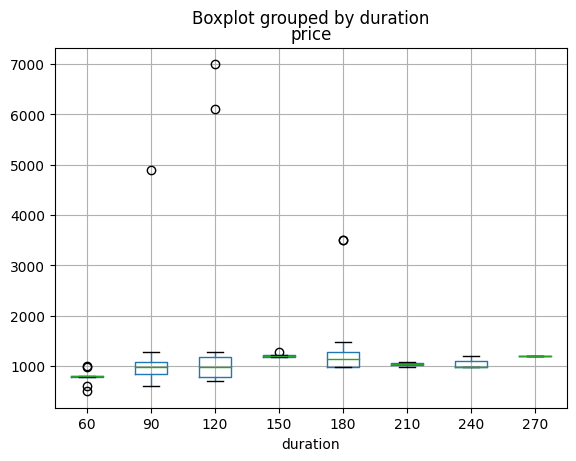

In [15]:
ax = df.boxplot(column='price', by='duration')

In [16]:
cpy_df = df.copy()
cpy_df = cpy_df[cpy_df['price'] < 3000]

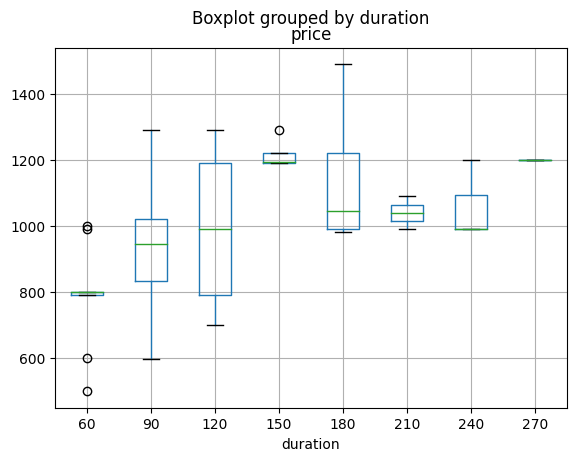

In [17]:
ax = cpy_df.boxplot(column='price', by='duration')

Отбросим из выборки данные с duration = 60, 270

In [18]:
cpy_df = cpy_df[(cpy_df['duration'] != 60) & (cpy_df['duration'] != 270)]

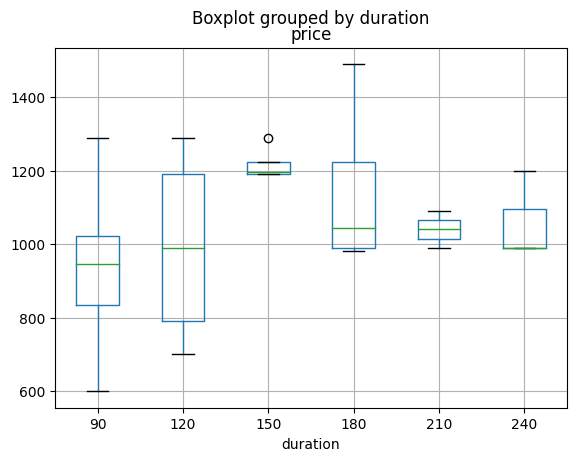

In [19]:
ax = cpy_df.boxplot(column='price', by='duration')

Данные все равно довольно разбросаны, поэтому сформируем 3 группы:
* Группа малой продолжительности квеста (< 120 мин)
* Группа средней продолжительности квеста (150 мин < x < 210 мин)
* Группа высокой продолжительности квеста (> 210 мин)

In [20]:
def get_group_duration(dur):
    if dur <= 90:
        return 'low'
    elif dur <= 150:
        return 'medium'
    else:
        return 'high'

In [21]:
grouped_df = df.copy()
grouped_df = grouped_df[grouped_df['price'] < 3000]
grouped_df = grouped_df.sort_values('duration')
grouped_df['group_duration'] = grouped_df['duration'].apply(get_group_duration)
grouped_df

,company,title,duration,route,gamers,price,place,group_duration
44,Ubego,Живые улицы,60,2.0,1 - 35,790,г. Санкт-Петербург,low
45,Ubego,Удивительные приключения Сэма и Дина Винчестеров,60,2.0,1 - 10,800,"м. Невский проспект, г. Санкт-Петербург",low
40,Ubego,В поисках Улисса,60,2.0,1 - 3,990,г. Санкт-Петербург,low
32,Ubego,Питерский андеграунд,60,2.0,1 - 10,800,"м. Лиговский проспект, г. Санкт-Петербург",low
31,Ubego,"Пушкин, Гоголь, Лермонтов на улицах Петербурга",60,2.0,1 - 10,800,"м. Невский проспект, г. Санкт-Петербург",low
...,...,...,...,...,...,...,...,...
57,Turest In,Эхо блокады в центре Петербурга,210,4.0,1-8,990,м. Адмиралтейская,high
5,IQ 365,Авантюристы Карибского моря,240,10.0,1-3,990,ЦПКиО им. Кирова (Санкт-Петербург),high
60,Квест-город,МОДЕРН В ПЕТЕРБУРГЕ,240,6.0,1-10,1200,"м. Горьковская, г. Санкт-Петербург",high
3,IQ 365,Шерлок Холмс. Дело о похищенном Кохинуре,240,8.0,1-3,990,ЦПКиО им. Кирова (Санкт-Петербург),high


In [22]:
grouped_df['group_duration'].value_counts()
grouped_df.head(100)

,company,title,duration,route,gamers,price,place,group_duration
44,Ubego,Живые улицы,60,2.0,1 - 35,790,г. Санкт-Петербург,low
45,Ubego,Удивительные приключения Сэма и Дина Винчестеров,60,2.0,1 - 10,800,"м. Невский проспект, г. Санкт-Петербург",low
40,Ubego,В поисках Улисса,60,2.0,1 - 3,990,г. Санкт-Петербург,low
32,Ubego,Питерский андеграунд,60,2.0,1 - 10,800,"м. Лиговский проспект, г. Санкт-Петербург",low
31,Ubego,"Пушкин, Гоголь, Лермонтов на улицах Петербурга",60,2.0,1 - 10,800,"м. Невский проспект, г. Санкт-Петербург",low
...,...,...,...,...,...,...,...,...
57,Turest In,Эхо блокады в центре Петербурга,210,4.0,1-8,990,м. Адмиралтейская,high
5,IQ 365,Авантюристы Карибского моря,240,10.0,1-3,990,ЦПКиО им. Кирова (Санкт-Петербург),high
60,Квест-город,МОДЕРН В ПЕТЕРБУРГЕ,240,6.0,1-10,1200,"м. Горьковская, г. Санкт-Петербург",high
3,IQ 365,Шерлок Холмс. Дело о похищенном Кохинуре,240,8.0,1-3,990,ЦПКиО им. Кирова (Санкт-Петербург),high


In [23]:
print(grouped_df[grouped_df['price'] < 700].count())
grouped_df.groupby('group_duration')['price'].agg(['count'])


company           3
title             3
duration          3
route             3
gamers            3
price             3
place             3
group_duration    3
dtype: int64


,count
group_duration,
high,18
low,21
medium,41


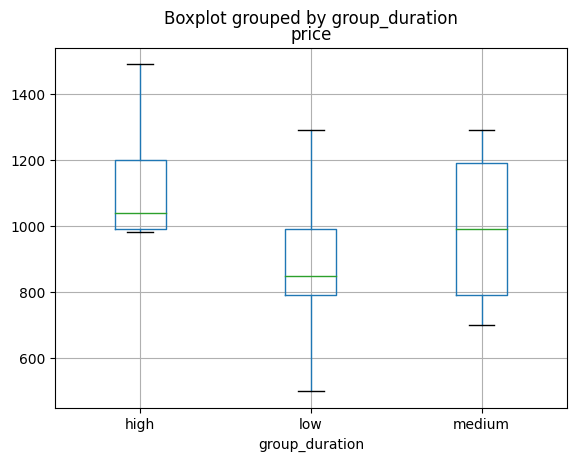

In [24]:
ax = grouped_df.boxplot(column='price', by='group_duration')

In [25]:
grouped_df.groupby('group_duration')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
group_duration,,,,,,,,
high,18.0,1108.944444,148.308293,981.0,990.0,1040.0,1200.0,1490.0
low,21.0,879.000000,191.668985,500.0,790.0,850.0,990.0,1290.0
medium,41.0,996.829268,178.807704,700.0,790.0,990.0,1190.0,1290.0


In [26]:
grouped_df.groupby(['company', 'group_duration'])['price'].agg(['median','max','min','mean','count']).sort_values('median')

median   max   min         mean  count
company      group_duration                                        
Fresh Quest  low              790.0   790   790   790.000000      3
             medium           790.0   990   790   840.000000     12
Ubego        low              875.0  1290   500   881.812500     16
Turest In    medium           940.0   990   890   940.000000      4
IQ 365       high             990.0   990   990   990.000000      2
             low              990.0   990   990   990.000000      2
             medium           990.0   990   990   990.000000      1
Turest In    high             990.0  1490   990  1091.666667      6
Ubego        medium           990.0  1290   700   961.666667     12
             high            1040.0  1200   981  1075.166667      6
Secret Guide medium          1190.0  1190  1190  1190.000000      5
Квест-город  high            1200.0  1200  1200  1200.000000      2
             medium          1200.0  1200  1200  1200.000000      2
Quests Team  high            1290.0  1290  1290  1290.000000      2
             medium          1290.0  1290  1290  1290.000000      2

In [27]:
grouped_df.groupby('group_duration')['price'].describe().sort_values('min')

,count,mean,std,min,25%,50%,75%,max
group_duration,,,,,,,,
low,21.0,879.000000,191.668985,500.0,790.0,850.0,990.0,1290.0
medium,41.0,996.829268,178.807704,700.0,790.0,990.0,1190.0,1290.0
high,18.0,1108.944444,148.308293,981.0,990.0,1040.0,1200.0,1490.0


In [28]:
grouped_df.to_csv('cities.csv')

# Исследование занятости мест

In [29]:
df_map = df.copy()
df_map.head(10)

,company,title,duration,route,gamers,price,place
0,Палитра,Итальянцы в Ленинграде,180,5.0,1-50,3500,"м. Невский проспект, г. Санкт-Петербург"
1,Палитра,Петропавловская крепость,90,2.0,2-30,4900,"м. Горьковская, г. Санкт-Петербург"
2,Палитра,Фонтаны Петергофа,120,3.0,1-18,6100,г. Петергоф
3,IQ 365,Шерлок Холмс. Дело о похищенном Кохинуре,240,8.0,1-3,990,ЦПКиО им. Кирова (Санкт-Петербург)
4,IQ 365,Шерлок Холмс и Черная книга,90,4.0,1-3,990,Приморский парк Победы (Санкт-Петербург)
5,IQ 365,Авантюристы Карибского моря,240,10.0,1-3,990,ЦПКиО им. Кирова (Санкт-Петербург)
6,IQ 365,Наследство американского дядюшки,90,3.0,1-3,990,Приморский парк победы (Санкт-Петербург)
7,IQ 365,В поисках Улисса,120,3.0,1-3,990,Петропавловская крепость (Санкт-Петербург)
8,Quests Team,Город под защитой ангелов,180,8.0,2-6,1290,"м. Василеостровская, г. Санкт-Петербург"
9,Quests Team,В поисках Пегасов,120,5.0,2-6,1290,"м. Василеостровская, г. Санкт-Петербург"


In [30]:
df_map['place'].unique()

array(['м. Невский проспект, г. Санкт-Петербург ',
       'м. Горьковская, г. Санкт-Петербург ', 'г. Петергоф',
       'ЦПКиО им. Кирова (Санкт-Петербург)',
       'Приморский парк Победы (Санкт-Петербург)',
       'Приморский парк победы (Санкт-Петербург)',
       'Петропавловская крепость (Санкт-Петербург)',
       'м. Василеостровская, г. Санкт-Петербург ',
       'м. Площадь Восстания, г. Санкт-Петербург',
       'м. Василеостровская, г. Санкт-Петербург',
       'м. Крестовский остров, г. Санкт-Петербург',
       'м. Гостиный двор, наб. канала Грибоедова, д. 5',
       'м. Чернышевская, ул. Фурштатская, д. 17', 'г. Санкт-Петербург',
       'м. Гостиный двор, г. Санкт-Петербург',
       'м. Адмиралтейская, пл. Исаакиевская, д. 5',
       'м. Адмиралтейская, пл. Дворцовая, д. 2',
       'м. Невский проспект, г. Санкт-Петербург',
       'ул. Петра Смородина, д. 8',
       'м. Достоевская, ул. Рубинштейна, д. 22',
       'м. Садовая, ул. Декабристов, д. 21 А',
       'м. Невский проспе

In [31]:
df_map = df_map.replace({'place': {'м. Невский проспект, г. Санкт-Петербург ' : 'м. Невский проспект, г. Санкт-Петербург',
                                  'м. Горьковская, г. Санкт-Петербург ': 'м. Горьковская, г. Санкт-Петербург',
                                  'Приморский парк победы (Санкт-Петербург)':'Приморский парк Победы (Санкт-Петербург)',
                                  'м. Василеостровская, г. Санкт-Петербург ': 'м. Василеостровская, г. Санкт-Петербург',
                                  'м. Площадь Восстания, пер. Орловский, д. 3': 'м. Площадь Восстания, г. Санкт-Петербург',
                                  'м. Гостиный двор, наб. канала Грибоедова, д. 5':'м. Гостиный двор, г. Санкт-Петербург',
                                  'м. Адмиралтейская, пл. Исаакиевская, д. 5': 'м. Адмиралтейская, г. Санкт-Петербург',
                                  'м. Адмиралтейская, пл. Дворцовая, д. 2': 'м. Адмиралтейская, г. Санкт-Петербург',
                                  'ул. Петра Смородина, д. 8':'м. Ладожская, г. Санкт-Петербург',
                                  'м. Достоевская, ул. Рубинштейна, д. 22':'м. Достоевская, г. Санкт-Петербург',
                                  'м. Садовая, ул. Декабристов, д. 21 А': 'м. Садовая, г. Санкт-Петербург',
                                  'м. Невский проспект, пр-т Невский, д. 30': 'м. Невский проспект, г. Санкт-Петербург',
                                  'м. Чернышевская, ул. Фурштатская, д. 17':'м. Чернышевская, г. Санкт-Петербург',
                                  'м. Балтийская, пер. Библиотечный, д. 4, к. 2':'м. Балтийская, г. Санкт-Петербург',
                                  'м. Адмиралтейская': 'м. Адмиралтейская, г. Санкт-Петербург',
                                  'м. Невский проспект, ул. Инженерная, д. 4':'м. Невский проспект, г. Санкт-Петербург',
                                  'м. Адмиралтейская, наб. Университетская, д. 1':'м. Адмиралтейская, г. Санкт-Петербург',
                                  'м. Звенигородская, ул. Звенигородская, д. 1, к. 2':'м. Звенигородская, г. Санкт-Петербург',
                                  'м. Адмиралтейская, пл. Труда, д. 5':'м. Адмиралтейская, г. Санкт-Петербург'}})

In [32]:
df_map['place'].unique()

array(['м. Невский проспект, г. Санкт-Петербург',
       'м. Горьковская, г. Санкт-Петербург', 'г. Петергоф',
       'ЦПКиО им. Кирова (Санкт-Петербург)',
       'Приморский парк Победы (Санкт-Петербург)',
       'Петропавловская крепость (Санкт-Петербург)',
       'м. Василеостровская, г. Санкт-Петербург',
       'м. Площадь Восстания, г. Санкт-Петербург',
       'м. Крестовский остров, г. Санкт-Петербург',
       'м. Гостиный двор, г. Санкт-Петербург',
       'м. Чернышевская, г. Санкт-Петербург', 'г. Санкт-Петербург',
       'м. Адмиралтейская, г. Санкт-Петербург',
       'м. Ладожская, г. Санкт-Петербург',
       'м. Достоевская, г. Санкт-Петербург',
       'м. Садовая, г. Санкт-Петербург',
       'м. Лиговский проспект, г. Санкт-Петербург',
       'м. Балтийская, г. Санкт-Петербург', 'г. Пушкин', 'г. Павловск',
       'м. Черная речка, г. Санкт-Петербург',
       'м. Владимирская, г. Санкт-Петербург', 'г. Кронштадт',
       'м. Звенигородская, г. Санкт-Петербург', 'г. Выборг'], dt

In [33]:
df_map.groupby('place')['place'].count()

place
Петропавловская крепость (Санкт-Петербург)     1
Приморский парк Победы (Санкт-Петербург)       2
ЦПКиО им. Кирова (Санкт-Петербург)             2
г. Выборг                                      1
г. Кронштадт                                   2
г. Павловск                                    1
г. Петергоф                                    1
г. Пушкин                                      1
г. Санкт-Петербург                            10
м. Адмиралтейская, г. Санкт-Петербург         14
м. Балтийская, г. Санкт-Петербург              2
м. Василеостровская, г. Санкт-Петербург        5
м. Владимирская, г. Санкт-Петербург            2
м. Горьковская, г. Санкт-Петербург             7
м. Гостиный двор, г. Санкт-Петербург           6
м. Достоевская, г. Санкт-Петербург             1
м. Звенигородская, г. Санкт-Петербург          1
м. Крестовский остров, г. Санкт-Петербург      2
м. Ладожская, г. Санкт-Петербург               1
м. Лиговский проспект, г. Санкт-Петербург      1
м. Невский про

In [34]:
petroga = [
    'м. Горьковская, г. Санкт-Петербург',
    'Петропавловская крепость (Санкт-Петербург)',
    'Приморский парк Победы (Санкт-Петербург)',
    'ЦПКиО им. Кирова (Санкт-Петербург)',
    'м. Крестовский остров, г. Санкт-Петербург'
]

vasyka = [
    'м. Василеостровская, г. Санкт-Петербург'
]

center = [
    'м. Адмиралтейская, г. Санкт-Петербург',
    'м. Владимирская, г. Санкт-Петербург',
    'м. Гостиный двор, г. Санкт-Петербург',
    'м. Достоевская, г. Санкт-Петербург',
    'м. Лиговский проспект, г. Санкт-Петербург',
    'м. Невский проспект, г. Санкт-Петербург',
    'м. Площадь Восстания, г. Санкт-Петербург',
    'м. Чернышевская, г. Санкт-Петербург'
]

admiral = [
    'м. Балтийская, г. Санкт-Петербург',
    'м. Звенигородская, г. Санкт-Петербург',
    'м. Садовая, г. Санкт-Петербург',
    'г. Санкт-Петербург'
    
]

other = [
    'м. Ладожская, г. Санкт-Петербург',
    'м. Черная речка, г. Санкт-Петербург',
]

def get_district(place):
    if place in petroga:
        return 'Петроградский район'
    elif place in vasyka:
        return 'Василеостровский район'
    elif place in center:
        return 'Центральный район'
    elif place in admiral:
        return 'Адмиралтейский район'
    else:
        return 'other'

In [35]:
df_map['district'] = df_map['place'].apply(get_district)
df_map.head(10)

,company,title,duration,route,gamers,price,place,district
0,Палитра,Итальянцы в Ленинграде,180,5.0,1-50,3500,"м. Невский проспект, г. Санкт-Петербург",Центральный район
1,Палитра,Петропавловская крепость,90,2.0,2-30,4900,"м. Горьковская, г. Санкт-Петербург",Петроградский район
2,Палитра,Фонтаны Петергофа,120,3.0,1-18,6100,г. Петергоф,other
3,IQ 365,Шерлок Холмс. Дело о похищенном Кохинуре,240,8.0,1-3,990,ЦПКиО им. Кирова (Санкт-Петербург),Петроградский район
4,IQ 365,Шерлок Холмс и Черная книга,90,4.0,1-3,990,Приморский парк Победы (Санкт-Петербург),Петроградский район
5,IQ 365,Авантюристы Карибского моря,240,10.0,1-3,990,ЦПКиО им. Кирова (Санкт-Петербург),Петроградский район
6,IQ 365,Наследство американского дядюшки,90,3.0,1-3,990,Приморский парк Победы (Санкт-Петербург),Петроградский район
7,IQ 365,В поисках Улисса,120,3.0,1-3,990,Петропавловская крепость (Санкт-Петербург),Петроградский район
8,Quests Team,Город под защитой ангелов,180,8.0,2-6,1290,"м. Василеостровская, г. Санкт-Петербург",Василеостровский район
9,Quests Team,В поисках Пегасов,120,5.0,2-6,1290,"м. Василеостровская, г. Санкт-Петербург",Василеостровский район


<Axes: ylabel='district'>

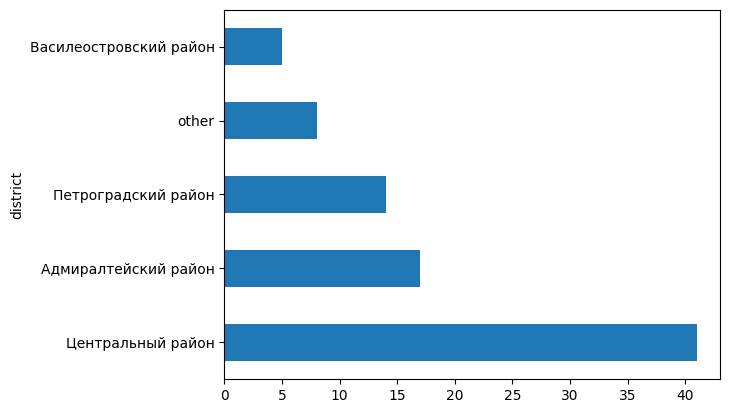

In [36]:
district = df_map['district'].value_counts()
district.plot.barh()

In [37]:
district

district
Центральный район         41
Адмиралтейский район      17
Петроградский район       14
other                      8
Василеостровский район     5
Name: count, dtype: int64